In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pathlib import Path

In [19]:
df = pd.read_csv('../../../data/train/train.csv')

In [20]:
print(df)

   ID  Age  CreditScore Education RiskLevel
0   1   35          720        16       Low
1   2   28          650        14      High
2   3   45          750   missing       Low
3   4   31          600        12      High
4   5   52          780        18       Low
5   6   29          630        14      High
6   7   42          710        16       Low
7   8   33          640        12      High


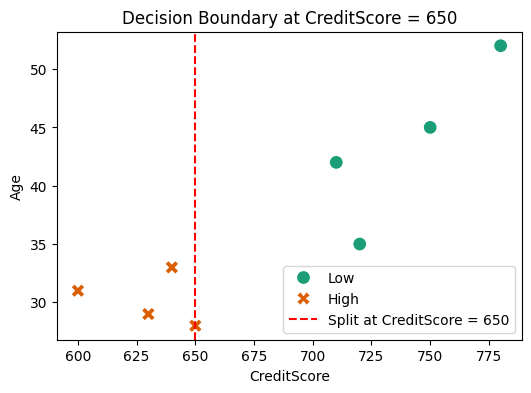

In [33]:
# Scatter plot showing the decision boundary
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="CreditScore", y="Age", hue="RiskLevel", style="RiskLevel", s=100, palette="Dark2")
plt.axvline(x=650, color="red", linestyle="--", label="Split at CreditScore = 650")
plt.title("Decision Boundary at CreditScore = 650")
plt.xlabel("CreditScore")
plt.ylabel("Age")
plt.legend()
plt.show()

In [ ]:
def compute_entropy(subset):
    """Computes entropy given class probabilities."""
    total = len(subset)
    if total == 0:
        return 0  # Avoid log(0) issues
    counts = subset.value_counts(normalize=True)  # Compute probabilities
    return -sum(p * math.log2(p) for p in counts if p > 0)

def compute_information_gain(df, feature, threshold, target):
    """Calculates the corrected information gain for a specified feature threshold."""
    # Compute total entropy before split
    total_entropy = compute_entropy(df[target])

    # Partition dataset
    left_subset = df[df[feature] <= threshold]
    right_subset = df[df[feature] > threshold]

    # Compute entropy for each subset
    left_entropy = compute_entropy(left_subset[target])
    right_entropy = compute_entropy(right_subset[target])

    # Compute weighted entropy
    weighted_entropy = (len(left_subset) / len(df)) * left_entropy + (len(right_subset) / len(df)) * right_entropy

    # Compute information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain, left_subset, right_subset

# Compute Information Gain for splitting on CreditScore at 650
information_gain_value, left_subset, right_subset = compute_information_gain(df, "CreditScore", 650, "RiskLevel")

# Display results
print(f"Computed Information Gain for splitting on CreditScore at 650: {information_gain_value:.3f}")

Computed Information Gain for splitting on CreditScore at 650: 1.000
The computed information gain indicates a moderate discriminatory power, suggesting that CreditScore at 650 may serve as a viable split for the decision tree.


C:\Users\tranq\AppData\Local\Temp\ipykernel_6100\2098878727.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=df, order=risk_order, palette="viridis")
C:\Users\tranq\AppData\Local\Temp\ipykernel_6100\2098878727.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=left_subset, order=risk_order, palette="coolwarm")
C:\Users\tranq\AppData\Local\Temp\ipykernel_6100\2098878727.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RiskLevel", data=right_subset, order=risk_order, palette="coolwarm")

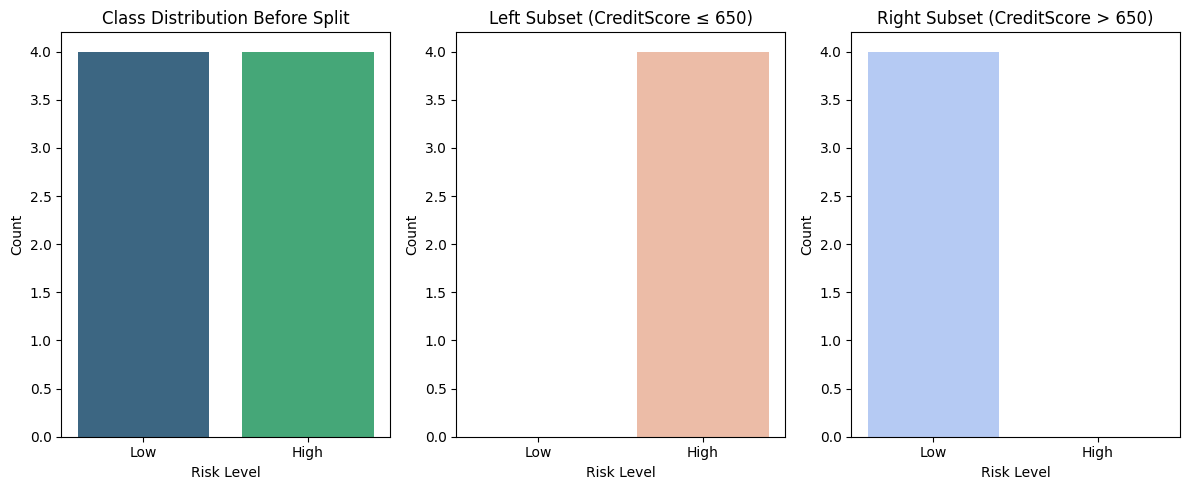

In [39]:

# Define risk level order to ensure both "High" and "Low" appear in each plot
risk_order = ["Low", "High"]

plt.figure(figsize=(12, 5))

# Plot original class distribution before split
plt.subplot(1, 3, 1)
sns.countplot(x="RiskLevel", data=df, order=risk_order, palette="viridis")
plt.title("Class Distribution Before Split")
plt.xlabel("Risk Level")
plt.ylabel("Count")

# Plot left subset (CreditScore ≤ 650)
plt.subplot(1, 3, 2)
sns.countplot(x="RiskLevel", data=left_subset, order=risk_order, palette="coolwarm")
plt.title("Left Subset (CreditScore ≤ 650)")
plt.xlabel("Risk Level")
plt.ylabel("Count")

# Plot right subset (CreditScore > 650)
plt.subplot(1, 3, 3)
sns.countplot(x="RiskLevel", data=right_subset, order=risk_order, palette="coolwarm")
plt.title("Right Subset (CreditScore > 650)")
plt.xlabel("Risk Level")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

### CONCLUSION

The computed Information Gain (IG) of 1.000 for splitting on CreditScore at 650 indicates a perfect classification, eliminating entropy and fully separating the dataset into homogeneous subsets. The left subset (CreditScore ≤ 650) contains only High-risk cases, while the right subset (CreditScore > 650) consists solely of Low-risk cases, confirming that CreditScore is a highly discriminative feature for risk classification.